## Preparation of data

Here are the imports:

In [5]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, SVC
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing, tree
import sklearn.metrics as metrics
from sklearn import preprocessing, neural_network, neighbors

Data is imported from csv preproccesed.

In [6]:
credit = pd.read_csv('default of credit card clients.csv')

In [7]:
credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,person,payment
0,3,90000,female,university,single,34,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,15549,1518,1500,1000,1000,1000,5000,0,female,no
1,4,50000,female,university,married,37,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,29547,2000,2019,1200,1100,1069,1000,0,female,no
2,5,50000,male,university,married,57,Paid in full,The use of revolving credit,Paid in full,The use of revolving credit,...,19131,2000,36681,10000,9000,689,679,0,male,no
3,6,50000,male,graduate school,single,37,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,20024,2500,1815,657,1000,1000,800,0,male,no
4,7,500000,male,graduate school,single,29,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,473944,55000,40000,38000,20239,13750,13770,0,male,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15331,29991,140000,male,university,married,41,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,46121,6000,7000,4228,1505,2000,2000,0,male,no
15332,29994,100000,male,graduate school,single,38,The use of revolving credit,Paid in full,Paid in full,The use of revolving credit,...,55004,2000,111784,4000,3000,2000,2000,0,male,no
15333,29996,220000,male,high school,married,39,The use of revolving credit,The use of revolving credit,The use of revolving credit,The use of revolving credit,...,15980,8500,20000,5003,3047,5000,1000,0,male,no
15334,29999,80000,male,high school,married,41,payment delay for one month,Paid in full,The use of revolving credit,The use of revolving credit,...,48944,85900,3409,1178,1926,52964,1804,1,male,yes


Converting data to categorical types.

In [8]:
credit["SEX"] = credit["SEX"].astype("category")
credit["EDUCATION"] = credit["EDUCATION"].astype("category")
credit["MARRIAGE"] = credit["MARRIAGE"].astype("category")
credit["PAY_0"] = credit["PAY_0"].astype("category")
credit["PAY_2"] = credit["PAY_2"].astype("category")
credit["PAY_3"] = credit["PAY_3"].astype("category")
credit["PAY_4"] = credit["PAY_4"].astype("category")
credit["PAY_5"] = credit["PAY_5"].astype("category")
credit["PAY_6"] = credit["PAY_6"].astype("category")

Generation of correlation matrix.

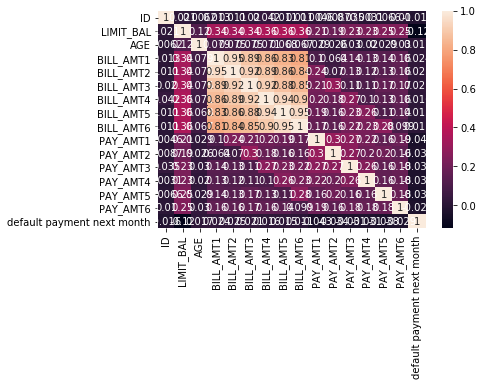

In [9]:
corrMatrix = credit.corr()
sn.heatmap(corrMatrix, annot=True)

In [10]:
x = credit.iloc[:,np.r_[1,5, 12:23]]
y = credit['PAY_AMT6']

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
xPrep = imp.fit_transform(x)

xTrain_tmp, xTest_tmp, yTrain, yTest = train_test_split(xPrep, y, test_size=0.4)

scaler = preprocessing.StandardScaler().fit(xTrain_tmp)
xTrain=scaler.transform(xTrain_tmp)
xTest=scaler.transform(xTest_tmp)


## Model creation

### Decision Tree

#### HyperParameters Search

In [11]:
hyperParams = {'min_samples_split': range(2,10)}


modelCV = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), 
                     hyperParams, cv=5, scoring='neg_mean_squared_error')

modelCV.fit(xTrain, yTrain)
print ("Best hyperparameters", modelCV.best_params_)
print ("\n\n")


/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best hyperparameters {'min_samples_split': 8}





#### Training and Prediction

In [12]:
model = tree.DecisionTreeClassifier(min_samples_split = modelCV.best_params_['min_samples_split'])

model.fit(xTrain, yTrain)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [96]:
yPred=model.predict(xTest)
metrics.mean_squared_error(yTest,yPred)
predRsquared = r2_score(yTest,yPred)
rmse = sqrt(mean_squared_error(yTest,yPred))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.720
RMSE: 25366.167


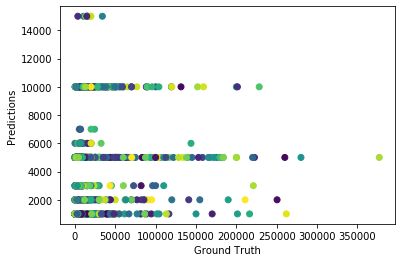

In [95]:
c = np.random.random(len(yPred))
plt.scatter(yTest, yPred, c=c)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

## Neural Networks

#### HyperParameters Search

In [14]:
i=0
a=[]

while (i<=2):
    i=i+1
    s = (i,)
    a.append(s)
    

#Generate grid search
hyperParams1 = {'hidden_layer_sizes': a,
        'alpha': [0.0001, 0.001, 0.01]}


#Create an instance of Neighbors Classifier and fit the data for the grid parameters
modelCV1 = GridSearchCV(neural_network.MLPClassifier(activation='tanh', solver='lbfgs'), 
                     hyperParams1, cv=5, scoring='neg_mean_squared_error')
modelCV1.fit(xTrain, yTrain)

/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='tanh', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
        

In [15]:
print ("Best hyperparameters", modelCV1.best_params_)
print ("\n\n")

Best hyperparameters {'alpha': 0.001, 'hidden_layer_sizes': (3,)}





#### Training and Prediction

In [16]:
model1 = neural_network.MLPClassifier(activation='tanh', solver='lbfgs', hidden_layer_sizes= modelCV1.best_params_['hidden_layer_sizes'],
                                  alpha= modelCV1.best_params_['alpha'] )

model1.fit(xTrain, yTrain)


MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [91]:
yPred1=model1.predict(xTest)
metrics.mean_squared_error(yTest,yPred1)
predRsquared1 = r2_score(yTest,yPred1)
rmse1 = sqrt(mean_squared_error(yTest,yPred1))
print('R Squared: %.3f' % predRsquared1)
print('RMSE: %.3f' % rmse1)

R Squared: -0.014
RMSE: 19475.614


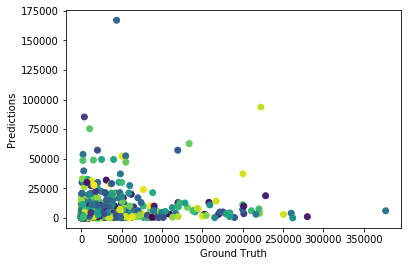

In [94]:
c = np.random.random(len(yPred2))
plt.scatter(yTest, yPred2, c=c)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### KNN

#### HyperParameters Search

In [18]:
hyperParams = {'n_neighbors': range(1,4), 
               'weights': ['uniform', 'distance']}
 
modelCV2 = GridSearchCV(neighbors.KNeighborsClassifier(), 
                     hyperParams, cv=5, scoring='neg_mean_squared_error')

modelCV2.fit(xTrain, yTrain)
print ("Best hyperparameters", modelCV2.best_params_)
print ("\n\n")


/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Best hyperparameters {'n_neighbors': 2, 'weights': 'uniform'}





/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Training and Prediction

In [19]:
model2 = neighbors.KNeighborsClassifier(n_neighbors= modelCV2.best_params_['n_neighbors'],
                                  weights= modelCV2.best_params_['weights'] )

model2.fit(xTrain, yTrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [88]:
yPred2=model2.predict(xTest)
metrics.mean_squared_error(yTest,yPred2)
predRsquared2 = r2_score(yTest,yPred2)
rmse2 = sqrt(mean_squared_error(yTest,yPred2))
print('R Squared: %.3f' % predRsquared2)
print('RMSE: %.3f' % rmse2)

R Squared: 0.010
RMSE: 19246.961


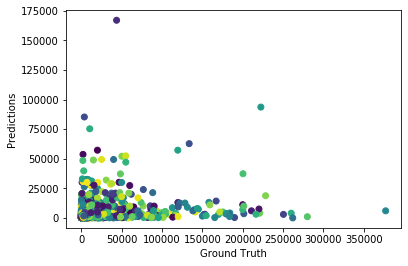

In [90]:
c = np.random.random(len(yPred2))
plt.scatter(yTest, yPred2, c=c)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

### SVC

#### HyperParameters Search

In [21]:
#Generate grid search
hyperParams = {'C': np.arange(0.5, 2, 0.5)}


#Create an instance of Neighbors Classifier and fit the data for the grid parameters
modelCV3 = GridSearchCV(SVC(kernel='rbf'), hyperParams, cv=5, scoring='neg_mean_squared_error')

modelCV3.fit(xTrain, yTrain)

print ("Best hyperparameters", modelCV3.best_params_)

/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/raulbarrantes/anaconda3/lib/python3.7/site-packages/s

Best hyperparameters {'C': 0.5}


#### Training and Prediction

In [26]:
model3 = SVC(C = modelCV3.best_params_['C'])

model3.fit(xTrain, yTrain)


SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
yPred3=model3.predict(xTest)
metrics.mean_squared_error(yTest,yPred3)
predRsquared3 = r2_score(yTest,yPred3)
rmse3 = sqrt(mean_squared_error(yTest,yPred3))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.006
RMSE: 19401.215


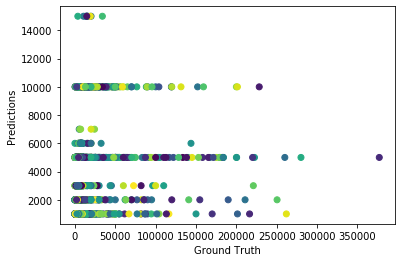

In [87]:
c = np.random.random(len(yPred))
plt.scatter(yTest, yPred, c=c)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();